In [1]:
import os
os.environ.update({"OMP_NUM_THREADS":"1","MKL_NUM_THREADS":"1","OPENBLAS_NUM_THREADS":"1","VECLIB_MAXIMUM_THREADS":"1","OMP_PROC_BIND":"TRUE"}) 

import torch
import matplotlib.pyplot as plt
import numpy as np
from heat import heat_nn

np.random.seed(238)
torch.manual_seed(301)

<class 'list'>
Epoch 0, Loss: 12.056853
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch 49, Loss: 4.621891
<class 'list'>


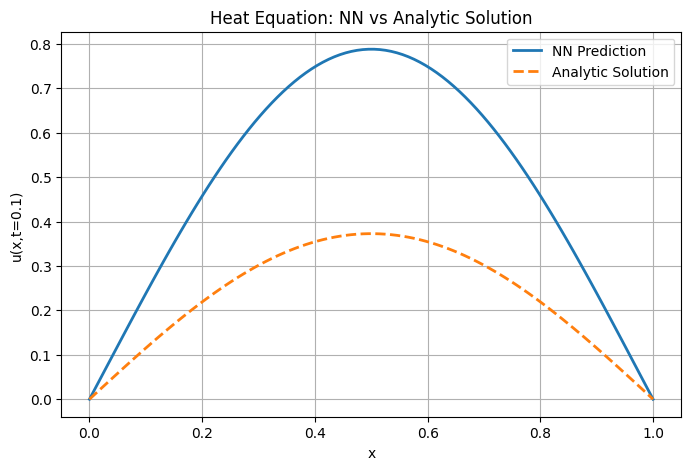

<class 'list'>


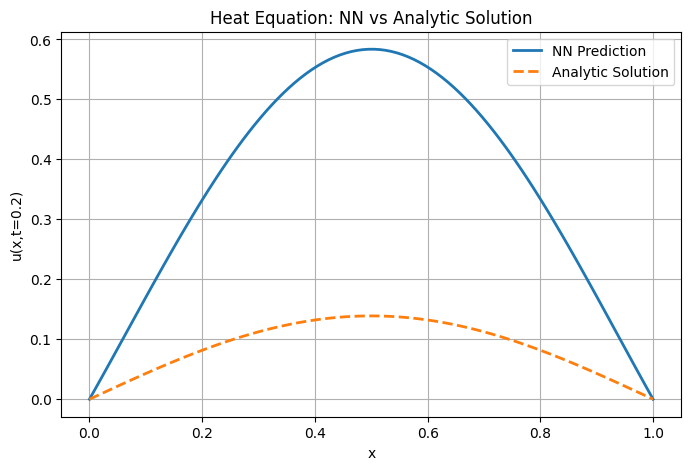

<class 'list'>


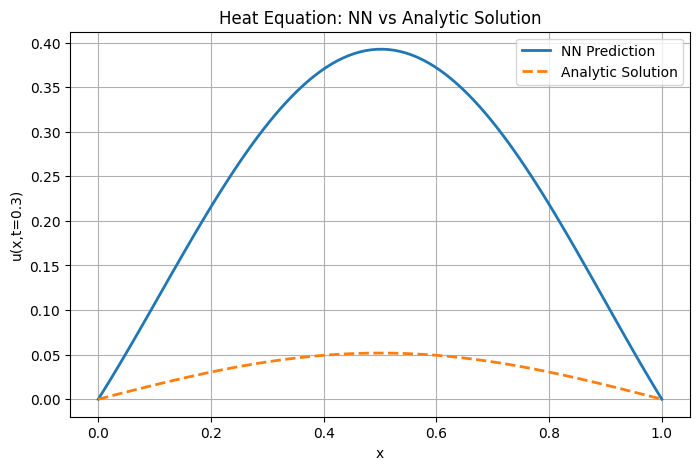

<class 'list'>


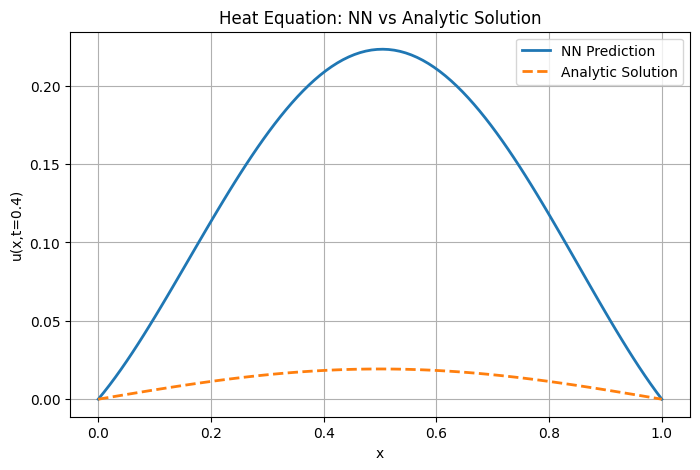

<class 'list'>


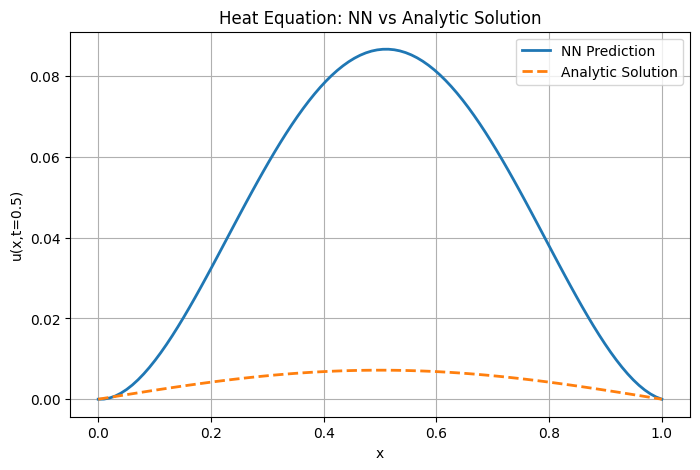

In [2]:
layers = [200, 100, 50, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
pde_nn = heat_nn(layers, activations, 1, lambda x: torch.sin(torch.pi * x))

N_colloc = 100

pde_nn.set_data(N_colloc)
pde_nn.train(lr=1e-3, weight_decay=0, epochs = 50, print_epochs=50)
#proper result for epochs =5000

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    x_test = torch.linspace(0,1,100).view(-1,1)
    t_test = torch.tensor([[t]]*100)  # t=0.5
    u_pred = pde_nn.trial_solution(x_test, t_test).detach().numpy()

    #compare results with analytic solution

    x_np = x_test.numpy().flatten()  # convert to 1D array for plotting
    t_val = t
    u_analytic = np.sin(np.pi * x_np) * np.exp(-np.pi**2 * t_val)

    # Plot the results
    plt.figure(figsize=(8,5))
    plt.plot(x_np, u_pred, label='NN Prediction', linewidth=2)
    plt.plot(x_np, u_analytic, '--', label='Analytic Solution', linewidth=2)
    plt.xlabel('x')
    plt.ylabel(f'u(x,t={t})')
    plt.title('Heat Equation: NN vs Analytic Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
"""
2D Heat equation
"""

layers = [200, 100, 50, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
pde_nn = heat_nn(layers, activations, 2, lambda x, y: (torch.sin(torch.pi * x) * torch.sin(torch.pi * y)))

N_colloc = 10

pde_nn.set_data(N_colloc, N_colloc, N_colloc)

pde_nn.train(lr=1e-3, weight_decay=0, epochs = 50, print_epochs=50)
#proper result for epochs =5000

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    x_test = torch.linspace(0,1,100).view(-1,1)
    y_test = torch.linspace(0,1,100).view(-1,1)
    t_test = torch.tensor([[t]]*100)  # t=0.5
    u_pred = pde_nn.trial_solution(x_test, y_test, t_test).detach().numpy()

<class 'list'>
Epoch 0, Loss: 23.853832
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch 49, Loss: 20.259142
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
